In [19]:
import numpy as np
import keras
from keras.datasets import imdb
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [7]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

del(np_load_old)

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        
    return results

In [44]:
x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

In [10]:
cls_model = models.Sequential()
cls_model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
cls_model.add(layers.Dense(16, activation = 'relu'))
cls_model.add(layers.Dense(1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
cls_model.compile(optimizer = 'rmsprop',  loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
np.shape(x_train)

(25000, 10000)

In [16]:
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

x_val = x_train[:10000]
y_val = y_train[:10000]

np.shape(partial_x_train)
#np.shape(x_val)

(15000, 10000)

In [17]:
#Training
history = cls_model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val) )

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 215us/step - loss: 0.6936 - acc: 0.4951 - val_loss: 0.6932 - val_acc: 0.5010
Epoch 2/20
15000/15000 [==============================] - 1s 51us/step - loss: 0.6837 - acc: 0.5753 - val_loss: 0.6949 - val_acc: 0.5027
Epoch 3/20
15000/15000 [==============================] - 1s 51us/step - loss: 0.6450 - acc: 0.6495 - val_loss: 0.7183 - val_acc: 0.5017
Epoch 4/20
15000/15000 [==============================] - 1s 60us/step - loss: 0.5886 - acc: 0.7136 - val_loss: 0.7353 - val_acc: 0.4953
Epoch 5/20
15000/15000 [==============================] - 1s 51us/step - loss: 0.5401 - acc: 0.7475 - val_loss: 0.7696 - val_acc: 0.4957
Epoch 6/20
15000/15000 [==============================] - 1s 53us/step - loss: 0.4924 - acc: 0.7857 - val_loss: 0.8225 - val_acc: 0.4992
Epoch 7/20
15000/15000 [==============================] - 1s 50us/step - loss: 

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [32]:
training_loss = history_dict['loss']
validation_loss = history_dict['val_loss']
epochs = range(1,len(training_loss)+1)

training_acc = history_dict['acc']
validation_acc = history_dict['val_acc']
epochs

range(1, 21)

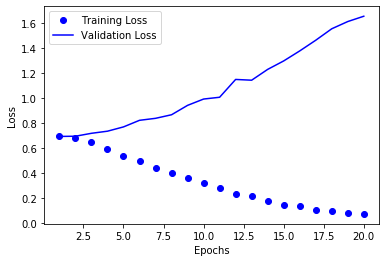

In [33]:
plt.plot(epochs, training_loss, 'bo', label = 'Training Loss')
plt.plot(epochs, validation_loss, 'b', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

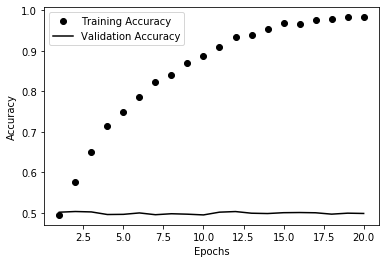

In [34]:
plt.plot(epochs, training_acc, 'ko', label = 'Training Accuracy')
plt.plot(epochs, validation_acc, 'k', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [40]:
PredOutProb = cls_model.predict(x_test)

In [98]:
PredOutClas = (PredOutProb<0.5)
PredOutClas.astype(int)

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [99]:
y_test = y_test.reshape((25000,1))

In [100]:
np.shape(y_test)

(25000, 1)

In [101]:
Err = y_test != PredOutClas

In [102]:
np.sum(Err)

12489

In [103]:
np.mean(Err)

0.49956